In [344]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd

sys.path.insert(0, "..") 
from src.data import make_dataset
from src.visualization import visualize

pd.set_option("display.precision", 5)
pd.set_option("display.max.columns", None)
pd.options.display.float_format = '{:6.5f}'.format


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Bonds

In dit onderzoek is uitgegaan van een beperkte set bonds. Het is nog onduidelijk of de data van verlopen bonds ook zinvol is voor het onderzoek. Een bond is typisch maar kort in portefeuille waardoor we geen lange tijdreeksen hebben van een bepaalde bond. Mogelijk komt de bond wel erg over een met andere bonds die we in het verleden hebben gehad en zegt het koerstverloop van die bonds iets over het koersverloop van de huidige bonds. Mogelijk spelen benchmark bonds hier een rol bij. 

In [345]:
df_bonds = make_dataset.get_bond_data()





2021-12-29 22:21:19.498 | INFO     | src.data.make_dataset:get_bond_data:36 - Load bond data
2021-12-29 22:21:19.499 | INFO     | src.data.make_dataset:read_csv:21 - Loading data from ..\data\raw\bonds.csv


In [346]:
df_bonds.head()

,ccy,country_name,issue_dt,first_coupon_date,mature_dt,issuer_name,coupon_frq,coupon,tot_issue,cfi_code,issue_rating,cfi_code1,cfi_code2,cfi_code3,cfi_code4,cfi_code5,cfi_code6,bond_duration
isin,,,,,,,,,,,,,,,,,,
NL0009086115,EUR,Netherlands,2009-02-13,2009-07-15,2019-07-15,STAAT DER NEDERLANDEN,ANNUAL,4.00000,5000000000.00000,DBFTFN,AAA,D,B,F,T,F,N,3652 days
NL0010071189,EUR,Netherlands,2012-03-09,2013-01-15,2033-01-15,STAAT DER NEDERLANDEN,ANNUAL,2.50000,4160000000.00000,DBFXXN,AAA,D,B,F,X,X,N,7305 days
NL0000102317,EUR,Netherlands,1998-01-15,1999-01-15,2028-01-15,STAAT DER NEDERLANDEN,ANNUAL,5.50000,8886814000.00000,DBFTFN,AAA,D,B,F,T,F,N,10592 days
DE0001102309,EUR,Germany,2013-01-18,2014-02-15,2023-02-15,Bondsrep ber,ANNUAL,1.50000,5000000000.00000,DBFTFB,AAA,D,B,F,T,F,B,3287 days
DE0001102374,EUR,Germany,2015-01-16,2016-02-15,2025-02-15,Bondsrep ber,ANNUAL,0.50000,5000000000.00000,DBFTFB,AAA,D,B,F,T,F,B,3288 days


In [347]:
df_bonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, NL0009086115 to ES0000012I32
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   ccy                113 non-null    string         
 1   country_name       113 non-null    category       
 2   issue_dt           113 non-null    datetime64[ns] 
 3   first_coupon_date  113 non-null    datetime64[ns] 
 4   mature_dt          113 non-null    datetime64[ns] 
 5   issuer_name        113 non-null    category       
 6   coupon_frq         113 non-null    category       
 7   coupon             113 non-null    float64        
 8   tot_issue          113 non-null    float64        
 9   cfi_code           113 non-null    object         
 10  issue_rating       113 non-null    category       
 11  cfi_code1          113 non-null    category       
 12  cfi_code2          113 non-null    category       
 13  cfi_code3          113 non-null    

In [348]:
df_bonds.describe()

,coupon,tot_issue,bond_duration
count,113.00000,113.00000,113
mean,1.21712,8736776615.92920,4326 days 04:53:05.840707968
std,1.46420,7161793011.57708,2669 days 07:42:59.628478688
min,0.00000,0.00000,1461 days 00:00:00
25%,0.01000,5000000000.00000,3287 days 00:00:00
50%,0.50000,5990462000.00000,3652 days 00:00:00
75%,1.75000,11626070000.00000,3653 days 00:00:00
max,6.25000,35119000000.00000,11688 days 00:00:00


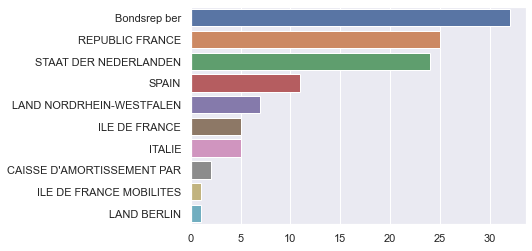

In [350]:
visualize.countplot(data = df_bonds, x = 'issuer_name')

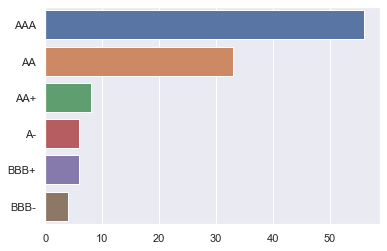

In [351]:
visualize.countplot(data = df_bonds, x = 'issue_rating')



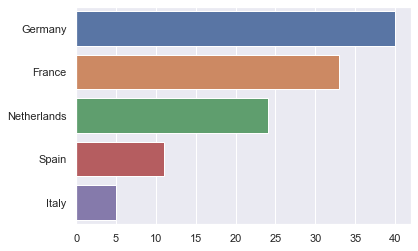

In [354]:
visualize.countplot(data = df_bonds, x = 'country_name')

Bond prices

In [355]:
df = make_dataset.get_data()

2021-12-29 22:22:41.663 | INFO     | src.data.make_dataset:get_bond_data:36 - Load bond data
2021-12-29 22:22:41.664 | INFO     | src.data.make_dataset:read_csv:21 - Loading data from ..\data\raw\bonds.csv
2021-12-29 22:22:41.736 | INFO     | src.data.make_dataset:get_price:125 - Load bond price data
2021-12-29 22:22:41.737 | INFO     | src.data.make_dataset:read_csv:21 - Loading data from ..\data\raw\price.csv


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122826 entries, 24 to 220236
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   reference_identifier  122826 non-null  string         
 1   ccy                   122826 non-null  string         
 2   rate_dt               122826 non-null  datetime64[ns] 
 3   mid                   122826 non-null  float64        
 4   country_name          122826 non-null  category       
 5   issue_dt              122826 non-null  datetime64[ns] 
 6   first_coupon_date     122826 non-null  datetime64[ns] 
 7   mature_dt             122826 non-null  datetime64[ns] 
 8   issuer_name           122826 non-null  category       
 9   coupon_frq            122826 non-null  category       
 10  coupon                122826 non-null  float64        
 11  tot_issue             122826 non-null  float64        
 12  cfi_code              122826 non-null  obje

3 2


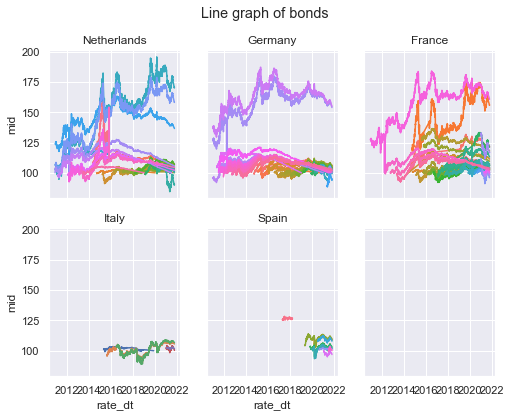

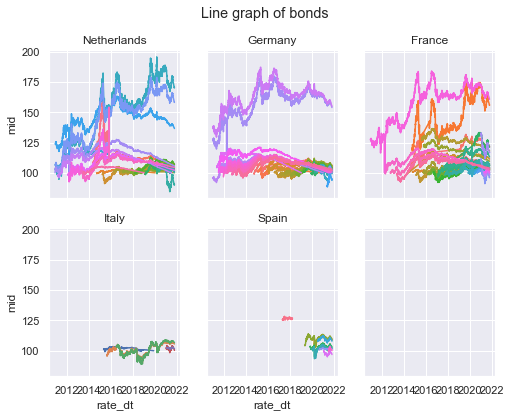

In [357]:
sns.set_theme(style="darkgrid")

visualize.grouped_lineplot(
    data = df, 
    ncols = 3, 
    x = 'rate_dt', 
    y = 'mid', 
    hue = 'reference_identifier', 
    group = 'country_name',
    title = 'Line graph of bonds'
)


Government Yield

In [359]:
df_yield = make_dataset.get_yield_curves()

2021-12-29 22:23:41.354 | INFO     | src.data.make_dataset:get_yield_curves:147 - Load goverment yield data
2021-12-29 22:23:41.355 | INFO     | src.data.make_dataset:read_csv:21 - Loading data from ..\data\raw\yield.csv


In [360]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89824 entries, 0 to 116894
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ratename   89824 non-null  string        
 1   ccy        89824 non-null  string        
 2   rate_dt    89824 non-null  datetime64[ns]
 3   timeband   89824 non-null  string        
 4   actual_dt  89824 non-null  datetime64[ns]
 5   datedays   89824 non-null  int64         
 6   bid        89824 non-null  float64       
 7   offer      89824 non-null  float64       
 8   int_basis  89824 non-null  string        
 9   country    89824 non-null  string        
dtypes: datetime64[ns](2), float64(2), int64(1), string(5)
memory usage: 7.5 MB


In [361]:
df_yield.head()

,ratename,ccy,rate_dt,timeband,actual_dt,datedays,bid,offer,int_basis,country
0,GOV Yield Curve DE BB,EUR,2017-02-07,1 YEAR,2018-02-09,367,-0.87500,-0.80400,ANNUAL,Germany
1,GOV Yield Curve DE BB,EUR,2017-02-07,2 YEARS,2019-02-11,734,-0.79900,-0.77300,ANNUAL,Germany
2,GOV Yield Curve DE BB,EUR,2017-02-07,3 YEARS,2020-02-10,1098,-0.76900,-0.75400,ANNUAL,Germany
3,GOV Yield Curve DE BB,EUR,2017-02-07,4 YEARS,2021-02-09,1463,-0.62000,-0.60200,ANNUAL,Germany
4,GOV Yield Curve DE BB,EUR,2017-02-07,5 YEARS,2022-02-09,1828,-0.41400,-0.40400,ANNUAL,Germany


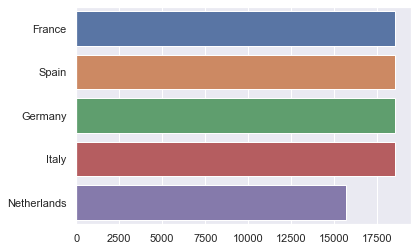

In [362]:
visualize.countplot(data = df_yield, x = 'country')

Credit Spread

Term Spread

Inflation

Inflation should be negatively correlated to the bond price